# Project: NBA Trends
*Analyze National Basketball Association (NBA) data to look at associations between teams, win-rates, playoff appearances, and more.*

In [3]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#to make the output look nicer
np.set_printoptions(suppress=True, precision = 2)

In [7]:
nba = pd.read_csv('nba_games.csv')
nba.head(100)

,game_id,year_id,fran_id,opp_fran,game_location,is_playoffs,pts,opp_pts,game_result,forecast,point_diff
0,194611010TRH,1947,Knicks,Huskies,A,0,68,66,W,0.359935,2
1,194611020CHS,1947,Knicks,Stags,A,0,47,63,L,0.368899,-16
2,194611020PRO,1947,Celtics,Steamrollers,A,0,53,59,L,0.359935,-6
3,194611050BOS,1947,Celtics,Stags,H,0,55,57,L,0.620204,-2
4,194611070STB,1947,Knicks,Bombers,A,0,68,63,W,0.339290,5
...,...,...,...,...,...,...,...,...,...,...,...
95,194703010NYK,1947,Knicks,Huskies,H,0,63,48,W,0.663350,15
96,194703010WSC,1947,Celtics,Capitols,A,0,52,75,L,0.113992,-23
97,194703060BOS,1947,Celtics,Falcons,H,0,74,65,W,0.629405,9
98,194703060GSW,1947,Knicks,Warriors,A,0,61,59,W,0.252931,2


In [11]:
# Subset Data to 2010 Season, 2014 Season
nba_2010 = nba[nba.year_id == 2010]
nba_2014 = nba[nba.year_id == 2014]

In [13]:
knicks_pts = nba_2010[nba_2010.fran_id == "Knicks"]
nets_pts = nba_2010[nba_2010.fran_id == "Nets"]

In [14]:
knicks_mean = knicks_pts.pts.mean()
nets_mean = nets_pts.pts.mean()
diff_means_2010 = knicks_mean - nets_mean
print("The difference etween the two teams' avarage points scored is ", round(diff_means_2010, 2))

The difference etween the two teams' avarage points scored is  9.73


Q1: Based on this value, is fran_id and pts are associated? Why or why not?

**Answer**: Based on this value it is hard to determine their relation. The difference is not extreme and obvious so there is no obvious association.

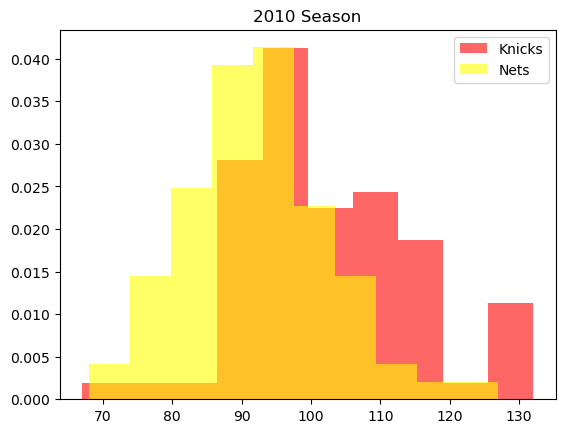

<Figure size 640x480 with 0 Axes>

In [16]:
plt.hist(knicks_pts.pts, label="Knicks", alpha=0.6, density=True, color='red')
plt.hist(nets_pts.pts, label="Nets", alpha=0.6, density=True, color='yellow')
plt.legend()
plt.title("2010 Season")
plt.show()
plt.clf()

Q2: Do the distributions appear to be the same?

**Answer**: The distribution seems quite different compared to their mean. They have different frequences compared with each other. They look associated

In [20]:
knicks_2014_pts = nba_2014[nba_2014.fran_id == 'Knicks'].pts
nets_2014_pts = nba_2014[nba_2014.fran_id == 'Nets'].pts

diff_means_2014 = knicks_2014_pts.mean() - nets_2014_pts.mean()
print(diff_means_2014)

0.44706798131809933


Q3: Did the difference in points get larger or smaller in 2014?

**Answer**: The difference in points got smaller in 2014

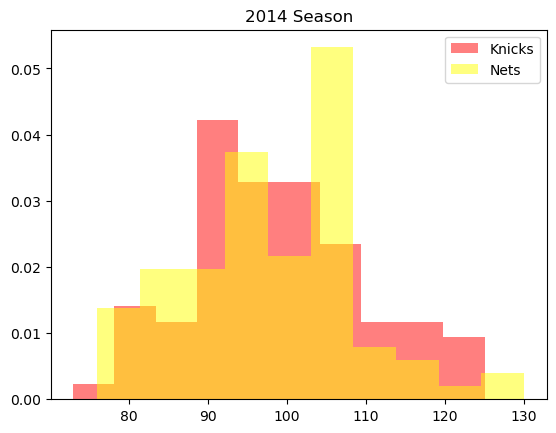

<Figure size 640x480 with 0 Axes>

In [23]:
plt.hist(knicks_2014_pts, label='Knicks', alpha=.5, density=True, color='red')
plt.hist(nets_2014_pts, label='Nets', alpha=.5, density=True, color='yellow')
plt.legend()
plt.title('2014 Season')
plt.show()
plt.clf()

Q4: Does the mean difference you calculated make sense?

**Answer**: The histogram clearly shows that the difference between nets and knicks in 2014 season decreased. They have more overlapping histograms. In conclusion, the mean makes sense and they are not strongly associated.

Let’s now include all teams in the dataset and investigate the relationship between franchise and points scored per game.

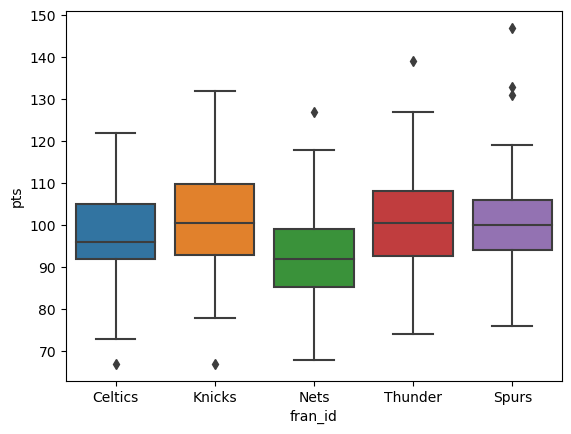

<Figure size 640x480 with 0 Axes>

In [25]:
sns.boxplot(data=nba_2010, x='fran_id', y='pts')
plt.show()
plt.clf()

**Conclusion**: This chart supports that fran_id and pts are associated. Especially, **Knicks** and **Nets** have an obvious association

Q5: Do teams tend to win more games at home compared to away ?

In [29]:
location_result_freq = pd.crosstab(nba_2010.game_result, nba_2010.game_location)
print(location_result_freq)

game_location    A    H
game_result            
L              133  105
W               92  120


In [31]:
location_result_proportions = location_result_freq / len(nba_2010)
print(location_result_proportions)

game_location         A         H
game_result                      
L              0.295556  0.233333
W              0.204444  0.266667


In [33]:
chi2, pval, dof, expected = chi2_contingency(location_result_freq)
print("Chi2 score is: ",chi2)
print(expected)

Chi2 score is:  6.501704455367053
[[119. 119.]
 [106. 106.]]


**Conclusion**: Based on this output, there is an weak association with 6.5.

**Deep Note**: *For a 2x2 table, Chi-squared greater than about 4 indicates an association.*

Q6: Do teams with a higher probability of winning also tend to win games by more points ?

In [37]:
nba_cov = np.cov(nba_2010.forecast, nba_2010.point_diff)
print("Covarience is: ",nba_cov[0][1])

Covarience is:  1.3746125676458794


In [40]:
point_diff_forecast_corr, p = pearsonr(nba_2010.forecast, nba_2010.point_diff)
print("Correlation is: ", point_diff_forecast_corr)

Correlation is:  0.4402088708468084


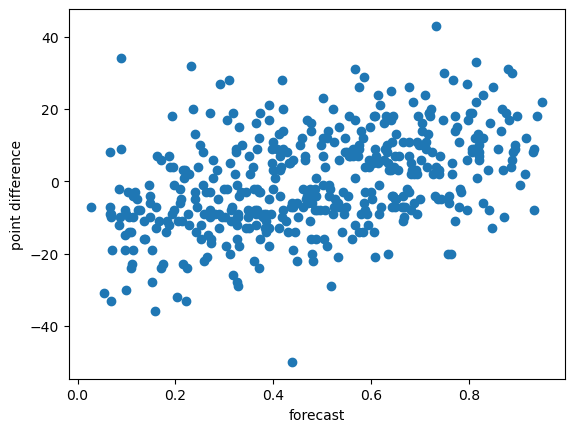

<Figure size 640x480 with 0 Axes>

In [42]:
plt.xlabel("forecast")
plt.ylabel("point difference")
plt.scatter(x=nba_2010.forecast, y=nba_2010.point_diff)
plt.show()
plt.clf()

**Answer**: There is a linear relation between the forecast and point difference